In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

/home/dro/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("train_dataset_train.csv")

/tmp/ipykernel_178915/1091673467.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_dataset_train.csv")


In [3]:
test = pd.read_csv('test_dataset_test.csv')

/tmp/ipykernel_178915/2639216236.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test_dataset_test.csv')


In [4]:
df["is_in_yandex"] = pd.Categorical(df["is_in_yandex"])
df["is_in_yandex"].astype('category').cat.codes
df["is_in_yandex"] = df["is_in_yandex"].cat.codes

In [5]:
test["is_in_yandex"] = pd.Categorical(test["is_in_yandex"])
test["is_in_yandex"].astype('category').cat.codes
test["is_in_yandex"] = test["is_in_yandex"].cat.codes

In [6]:
df["is_return"] = pd.Categorical(df["is_return"])
df["is_return"].astype('category').cat.codes
df["is_return"] = df["is_return"].cat.codes

In [7]:
test["is_return"] = pd.Categorical(test["is_return"])
test["is_return"].astype('category').cat.codes
test["is_return"] = test["is_return"].cat.codes

In [11]:
col_obj = df.select_dtypes(include=['object']).columns.values
col_obj = list(set(col_obj) ^ set(["id", "label"]))

In [165]:
X = df.drop(col_obj, axis = 1)
y = df[["label"]]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

## Обучение модели

In [167]:
import lightgbm as lgb
import catboost as cb

In [168]:
from sklearn.ensemble import BaggingClassifier

In [169]:
clf = lgb.LGBMClassifier(num_leaves=2047, random_state=42, learning_rate=0.02, n_estimators=200)

In [ ]:
clf.fit(X_train, y_train, eval_set=(X_test, y_test), eval_metric='auc', early_stopping_rounds=50)

/home/dro/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dro/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.946691	valid_0's binary_logloss: 0.126523
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.947614	valid_0's binary_logloss: 0.122752
[3]	valid_0's auc: 0.948013	valid_0's binary_logloss: 0.119697
[4]	valid_0's auc: 0.948392	valid_0's binary_logloss: 0.11707
[5]	valid_0's auc: 0.948582	valid_0's binary_logloss: 0.114804
[6]	valid_0's auc: 0.948818	valid_0's binary_logloss: 0.112764
[7]	valid_0's auc: 0.949078	valid_0's binary_logloss: 0.110933
[8]	valid_0's auc: 0.949339	valid_0's binary_logloss: 0.109257
[9]	valid_0's auc: 0.949461	valid_0's binary_logloss: 0.107735
[10]	valid_0's auc: 0.949618	valid_0's binary_logloss: 0.106318
[11]	valid_0's auc: 0.949672	valid_0's binary_logloss: 0.10502
[12]	valid_0's auc: 0.949754	valid_0's binary_logloss: 0.103809
[13]	valid_0's auc: 0.949827	valid_0's binary_logloss: 0.102678
[14]	valid_0's auc: 0.949925	valid_0's binary_logloss: 0.101604
[15]	valid_0's auc: 0.950053	valid_0's binary_logloss:

[127]	valid_0's auc: 0.952114	valid_0's binary_logloss: 0.0751852
[128]	valid_0's auc: 0.95212	valid_0's binary_logloss: 0.0751501
[129]	valid_0's auc: 0.95212	valid_0's binary_logloss: 0.0751168
[130]	valid_0's auc: 0.952119	valid_0's binary_logloss: 0.0750857
[131]	valid_0's auc: 0.952133	valid_0's binary_logloss: 0.075047
[132]	valid_0's auc: 0.952155	valid_0's binary_logloss: 0.0750073
[133]	valid_0's auc: 0.952155	valid_0's binary_logloss: 0.0749786
[134]	valid_0's auc: 0.952151	valid_0's binary_logloss: 0.074947
[135]	valid_0's auc: 0.952157	valid_0's binary_logloss: 0.0749175
[136]	valid_0's auc: 0.952171	valid_0's binary_logloss: 0.0748848
[137]	valid_0's auc: 0.952178	valid_0's binary_logloss: 0.0748539
[138]	valid_0's auc: 0.952191	valid_0's binary_logloss: 0.0748244
[139]	valid_0's auc: 0.952207	valid_0's binary_logloss: 0.0747903
[140]	valid_0's auc: 0.952205	valid_0's binary_logloss: 0.0747586
[141]	valid_0's auc: 0.952215	valid_0's binary_logloss: 0.0747296
[142]	valid_0'

## Оценка точности

In [155]:
pred = clf.predict_proba(X_test)[:, 1] > 0.03

In [156]:
from sklearn.metrics import recall_score, roc_auc_score

score = recall_score(y_test, pred, average = "macro" )
roc_auc_score(y_test, pred, multi_class='ovo')

0.6471670259254707

In [157]:
print("Recall", score)

Recall 0.6471670259254707


In [143]:
import seaborn as sns

<AxesSubplot:>

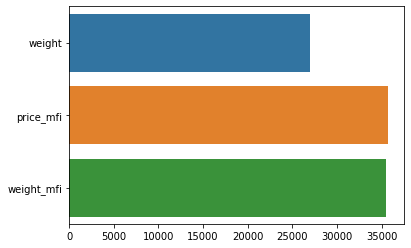

In [158]:
sns.barplot(y=X_test.columns, x=clf.feature_importances_)

In [145]:
columns = ['weight', 'price_mfi', 'weight_mfi']

In [146]:
X[columns]

,weight,price_mfi,weight_mfi
0,87.0,150.0,41.0
1,107.0,400.0,68.0
2,50.0,218.0,56.0
3,416.0,100.0,33.0
4,795.0,1000.0,716.0
...,...,...,...
5999995,25.0,100.0,24.0
5999996,83.0,1832.0,100.0
5999997,1700.0,800.0,952.0
5999998,269.0,0.0,0.0


In [105]:
ss = pd.read_csv('sample_solution.csv')

In [95]:
ss['label'] = (clf.predict_proba(test[X_test.columns])[:, 1] > 0.03).astype(int)

In [96]:
ss.to_csv('solut.csv', index=False)

In [97]:
ss['label'].mean()

0.19474525